In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
m = train[' Label'].size
n = test[' Label'].size

## N=4 gave minimum train/test error.
## N=1 gave maximum train/test error.

# Lasso Regression

In [3]:
def cost_function(X,y,theta,lam):
    J = 0
    m = y.shape[0]
    h = np.dot(theta,X)    
    J = (1/(2 * m)) * (np.sum(np.square(np.dot(theta, X) - y)) + lam*sum(theta))
    return J

In [4]:
def gradientDescent(X, y, theta, alpha, num_iters,lam):
    m = y.shape[0]  
    theta = theta.copy()
    
    J_history = [] 
    
    for i in range(num_iters): 
#         h = np.dot(theta,X) - y
        theta = theta - (alpha / m) * ((np.dot(theta,X) - y).dot(X.T)) - (alpha*lam/(2*m))
#         print(theta)
        J_history.append(cost_function(X, y, theta, lam))
    
    return theta, J_history

In [5]:
def LLG(train,test,k,alpha,iterations,lam):
#     errors = []
    Xtr = train['Feature']
    Ytr = train[' Label']
    Xts = np.array(test['Feature'])
    Yts = np.array(test[' Label'])
    Xtr = np.array([Xtr**i for i in range(k+1)])
    Xts = np.array([Xts**i for i in range(k+1)])
    theta = np.zeros(k+1)
    theta, J_history = gradientDescent(Xtr ,Ytr, theta, alpha, iterations, lam)
    predict = np.dot(theta,Xts)
#     plt.scatter(test['Feature'],test[' Label'])
#     plt.scatter(Xts[1,:],predict)
#     plt.pause(0.000001)
#     plt.plot(J_history)
#     errors.append((J_history[-1], cost_function(Xts, Yts, theta,lam)))
    return J_history[-1], cost_function(Xts, Yts, theta,lam)

Train Error:  [0.09956137511416671, 0.09944359713847088, 0.09932576319752327, 0.09920787329132384]
Test Error:  [0.09497768460582219, 0.09439101956416412, 0.0938038450315149, 0.0932161610078744]


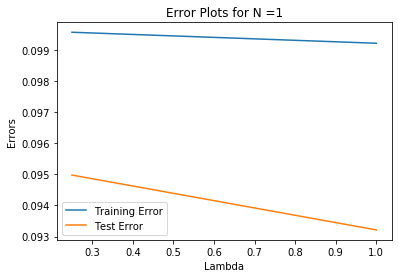

Train Error:  [0.06260504279315474, 0.06256812059244671, 0.0625310076639282, 0.06249370400760132]
Test Error:  [0.0635932746739562, 0.0633462545890622, 0.06309758132655233, 0.06284725488643118]


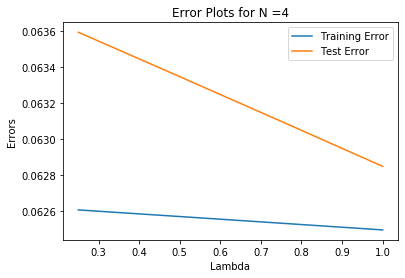

In [6]:
for i in [1,4]:
    errtr=[]
    errts=[]
    for j in [0.25,0.5,0.75,1]:
        _1, _2 = LLG(train,test,i,0.05,10000,j)
        errtr.append(_1)
        errts.append(_2)
        plt.pause(0.000001)
    print('Train Error: ',errtr)
    print('Test Error: ', errts)
    n = [0.25,0.5,0.75,1]
    plt.pause(0.00000001)
    plt.plot(n,errtr)
    plt.plot(n,errts)
    plt.legend(['Training Error', 'Test Error'])
    plt.xlabel('Lambda')
    plt.ylabel('Errors')
    plt.title('Error Plots for N ='+str(i))
    plt.pause(0.00000001)

# Ridge Regression

In [7]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
m = train[' Label'].size
n = test[' Label'].size


def cost_function(X,y,theta,lam):
    J = 0
    m = y.shape[0]
    h = np.dot(theta,X)    
    J = (1/(2 * m)) * (np.sum(np.square(np.dot(theta, X) - y)) + lam*sum(np.square(theta)))
    return J

def gradientDescent(X, y, theta, alpha, num_iters,lam):
    m = y.shape[0]  
    theta = theta.copy()
    
    J_history = [] 
    
    for i in range(num_iters): 
#         h = np.dot(theta,X) - y
        theta = theta - (alpha / m) * ((np.dot(theta,X) - y).dot(X.T)) - (alpha*lam/(m))*theta
#         print(theta)
        J_history.append(cost_function(X, y, theta, lam))
    
    return theta, J_history

def RLG(train,test,k,alpha,iterations,lam):
#     errors = []
    Xtr = train['Feature']
    Ytr = train[' Label']
    Xts = np.array(test['Feature'])
    Yts = np.array(test[' Label'])
    Xtr = np.array([Xtr**i for i in range(k+1)])
    Xts = np.array([Xts**i for i in range(k+1)])
    theta = np.zeros(k+1)
    theta, J_history = gradientDescent(Xtr ,Ytr, theta, alpha, iterations, lam)
    predict = np.dot(theta,Xts)
#     plt.scatter(test['Feature'],test[' Label'])
#     plt.scatter(Xts[1,:],predict)
#     plt.pause(0.000001)
#     plt.plot(J_history)
#     errors.append((J_history[-1], cost_function(Xts, Yts, theta,lam)))
    return J_history[-1], cost_function(Xts, Yts, theta,lam)

Train Error:  [0.1002156032257326, 0.1007482451232667, 0.10127706451400809, 0.10180210249691876]
Test Error:  [0.098198456559248, 0.10079867480744646, 0.10336503183197727, 0.10589805449742513]


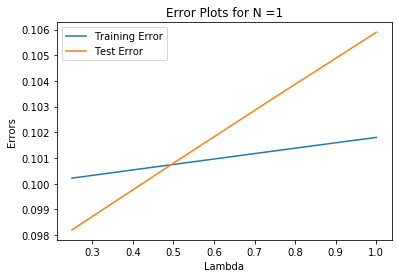

Train Error:  [0.06599074079835111, 0.06897201732194712, 0.07164204423601427, 0.07404753854658137]
Test Error:  [0.07584353967234765, 0.08617283340804492, 0.09510429045495189, 0.10286636612549088]


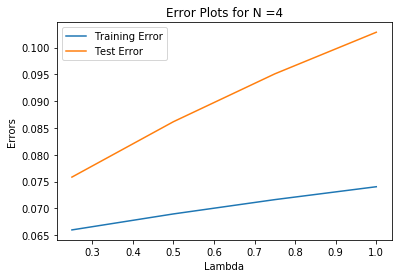

In [8]:
for i in [1,4]:
    errtr=[]
    errts=[]
    for j in [0.25,0.5,0.75,1]:
        _1, _2 = RLG(train,test,i,0.05,10000,j)
        errtr.append(_1)
        errts.append(_2)
        plt.pause(0.000001)
    print('Train Error: ',errtr)
    print('Test Error: ', errts)
    n = [0.25,0.5,0.75,1]
    plt.pause(0.00000001)
    plt.plot(n,errtr)
    plt.plot(n,errts)
    plt.legend(['Training Error', 'Test Error'])
    plt.xlabel('Lambda')
    plt.ylabel('Errors')
    plt.title('Error Plots for N ='+str(i))
    plt.pause(0.00000001)

# Answer for difference in the two regressions and which one to prefer for our case.

## Difference:
The basic difference is that in Lasso Regression the training and testing error decreased with increasing lambda and the vice-versa happened in Ridged regression.

## Preference:
On comparing the train and test error value, the conclusion drawn is that it is better to use Lasso regression for this case as even the minimum error for a particular N in Ridge regression is more than the maximum error in Lasso regression.